In [1]:
# Numpy and Pandas 
import numpy as np
import pandas as pd

# Vizualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError

# Save python object to disk
import pickle

from keras import backend as K

from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from sklearn.metrics import confusion_matrix , classification_report
import tensorflow.python.keras
from tensorflow.python.keras.models import Sequential 
from tensorflow.python.keras.models import model_from_json
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras import backend as K
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

In [2]:
df = pd.read_csv(r"D:\Ram\MTech\Final_Year_Paper_Work\IEEE_Dataset\Measurement Data\Measurement_Data\Measurement Data\TripA01.csv")

In [3]:
df

,Time [s],Velocity_[km/h],Elevation_[m],Throttle_ [%],Motor_Torque_[Nm],LongitudinalAcceleration_[m/s^2],Regenerative_Braking_Signal,Battery_Voltage_[V],Battery_Current_[A],Battery_Temperature_[?],...,AirCon_Power_[kW],Heater_Signal,Heater_Voltage_[V],Heater_Current_[A],Ambient_Temperature_[?],Coolant_Temperature_Heatercore_[?],Requested_Coolant_Temperature_[?],Coolant_Temperature_Inlet_[?],Heat_Exchanger_Temperature_[?],Cabin_Temperature_Sensor_[?]
0,0.0,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.20,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
1,0.1,0.00,574.0,0.00,0.0,0.00,0.0,391.40,-2.21,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
2,0.2,0.00,574.0,0.00,0.0,-0.01,0.0,391.40,-2.26,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
3,0.3,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
4,0.4,0.00,574.0,0.00,0.0,-0.03,0.0,391.40,-2.30,21.0,...,0.40,1,0,0,25.5,0,0,0,30.5,24.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,1008.5,20.71,565.0,25.06,-9.4,-0.28,0.0,387.91,-3.12,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10086,1008.6,20.60,565.0,23.57,-8.9,-0.24,0.0,387.96,-2.37,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10087,1008.7,20.44,565.0,22.55,-12.4,-0.31,0.0,388.01,-1.62,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67
10088,1008.8,20.30,565.0,22.55,-15.2,-0.40,0.0,388.06,-0.92,22.0,...,1.92,1,0,0,33.0,0,0,0,5.0,22.67


In [4]:
df.shape

(10090, 28)

In [6]:
df = df.drop()
df.info()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

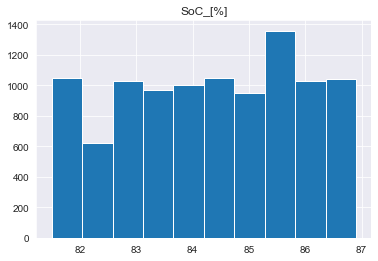

In [5]:
df.hist(column='SoC_[%]')
plt.show()

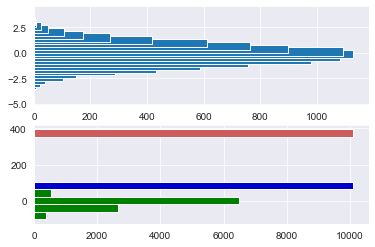

In [6]:
df1=df["Battery_Voltage_[V]"]
df2=df["SoC_[%]"]
df3=df["Battery_Current_[A]"]
df4=df["Battery_Temperature_[?]"]
df5=df["Velocity_[km/h]"]

colors1 = ['indianred', 'mediumblue','green','black','brown']
names = ['Voltage','SoC', 'Current', 'Temperature', 'Speed']

colors = ['indianred', 'mediumblue','green']
plt.hist([df1, df2, df3, df4, df5], bins = int(180/15), stacked=True,
         color = colors1, label=names, orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%), Battery_Capacity, Driving_Range, Speed, Temperature')
plt.title('Voltage, Current, SoC')
sample=np.random.normal(size=10000)
vert_hist=np.histogram(sample,bins=30)
ax1=plt.subplot(2,1,1)
ax1.barh(vert_hist[1][:-1],vert_hist[0])
ax2=plt.subplot(2,1,2)
ax2.hist([df1, df2, df3], bins = int(180/15), stacked=True,
         color = colors, label=names,orientation='horizontal')
plt.show()

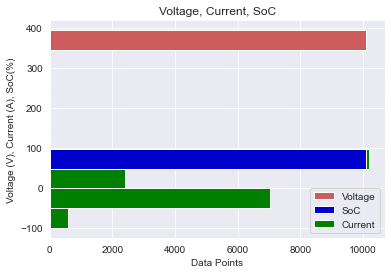

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Voltage, Current, SoC')

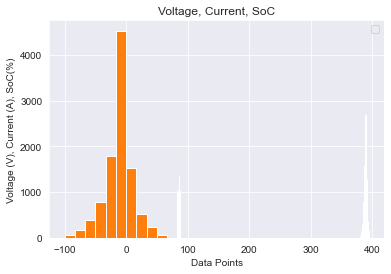

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig=plt.hist([df1, df2,df3], stacked=True,
         color = colors,label=names,orientation='horizontal')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')


# ax.hist([df1, df2,df3], bins, orientation='horizontal')
plt.show()
plt.savefig('Data.jpeg', dpi=600)

plt.hist(df1)
plt.hist(df3)
plt.hist(df2)
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Voltage (V), Current (A), SoC(%)')
plt.title('Voltage, Current, SoC',loc='center')

In [8]:
y = df['SoC_[%]']
dfX = df.drop(['max_SoC_ [%)','Heating_Power_CAN_[kW]','Heating_Power_LIN_[W]','Requested_Heating_Power_[W]','AirCon_Power_[kW]','Heater_Signal','Heater_Voltage_[V]','Heater_Current_[A]','Ambient_Temperature_[?]','Coolant_Temperature_Heatercore_[?]','Requested_Coolant_Temperature_[?]','Coolant_Temperature_Inlet_[?]','Heat_Exchanger_Temperature_[?]','Cabin_Temperature_Sensor_[?]','displayed_SoC_ [%]','min_SoC_ [%]','max_Battery_Temperature_[?]','Time [s]','Velocity_[km/h]','Elevation_[m]','Throttle_ [%]','Motor_Torque_[Nm]','LongitudinalAcceleration_[m/s^2]','Regenerative_Braking_Signal'], axis='columns')
print(dfX)

       Battery_Voltage_[V]  Battery_Current_[A]  Battery_Temperature_[?]  \
0                   391.40                -2.20                     21.0   
1                   391.40                -2.21                     21.0   
2                   391.40                -2.26                     21.0   
3                   391.40                -2.30                     21.0   
4                   391.40                -2.30                     21.0   
...                    ...                  ...                      ...   
10085               387.91                -3.12                     22.0   
10086               387.96                -2.37                     22.0   
10087               388.01                -1.62                     22.0   
10088               388.06                -0.92                     22.0   
10089               388.10                -0.30                     22.0   

       SoC_[%]  
0         86.9  
1         86.9  
2         86.9  
3         86.9  
4 

In [9]:
y.head(10)

0    86.9
1    86.9
2    86.9
3    86.9
4    86.9
5    86.9
6    86.9
7    86.9
8    86.9
9    86.9
Name: SoC_[%], dtype: float64

In [10]:
y.shape

(10090,)

In [11]:
dfX.head(10)

,Battery_Voltage_[V],Battery_Current_[A],Battery_Temperature_[?],SoC_[%]
0,391.4,-2.20,21.0,86.9
1,391.4,-2.21,21.0,86.9
2,391.4,-2.26,21.0,86.9
3,391.4,-2.30,21.0,86.9
4,391.4,-2.30,21.0,86.9
5,391.4,-2.30,21.0,86.9
6,391.4,-2.30,21.0,86.9
7,391.4,-2.31,21.0,86.9
8,391.4,-2.36,21.0,86.9
9,391.4,-2.37,21.0,86.9


In [12]:
dfX.shape

(10090, 4)

In [13]:
dfX_train, dfX_test, y_train, y_test = train_test_split(dfX, y, test_size = 0.3, random_state=1234)

dfX_train = np.expand_dims(np.array(dfX_train),1)
y_train = np.expand_dims(np.array(y_train),1)
dfX_test = np.expand_dims(np.array(dfX_test),1)
y_test = np.expand_dims(np.array(y_test),1)

#pipelines = {
#    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=1234))
#}
print(dfX_train)

[[[388.84   2.2   22.    82.6 ]]

 [[389.1   -4.82  22.    84.  ]]

 [[387.32 -20.02  22.    84.2 ]]

 ...

 [[391.36  33.04  22.    83.11]]

 [[388.67 -25.66  22.    86.3 ]]

 [[385.83 -21.83  22.    82.1 ]]]


In [14]:
print(y)

0        86.9
1        86.9
2        86.9
3        86.9
4        86.9
         ... 
10085    81.5
10086    81.5
10087    81.5
10088    81.5
10089    81.5
Name: SoC_[%], Length: 10090, dtype: float64


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
dataset = df2.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [25]:
dataset = dfX.values #numpy.ndarray
dataset = dataset.astype('float64')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [17]:
print(dfX_train.dtype)
print(y_train.dtype)
print(dfX_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


In [18]:
dfX_train.shape

(7063, 1, 4)

In [19]:
y_train.shape

(7063, 1)

In [20]:
## Import Necessary Modules
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects
from tensorflow import keras
class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [21]:
model = Sequential()

model.add(tf.keras.layers.Conv1D(32, 16, padding='same' , name = 'conv1', activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(16, 5, padding='same', name = 'conv2', activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(8, 3, padding='same' , name = 'conv3', activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.Conv1D(1, 1, name = 'conv4', activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("Mish"))

model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Activation("relu"))
#model.add(tf.keras.layers.Dense(1))

model.build(input_shape=(None,1,4))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv1D)               (None, 1, 32)             2080      
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 32)             128       
_________________________________________________________________
activation (Activation)      (None, 1, 32)             0         
_________________________________________________________________
conv2 (Conv1D)               (None, 1, 16)             2576      
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 16)             64        
_________________________________________________________________
activation_1 (Activation)    (None, 1, 16)             0         
_________________________________________________________________
conv3 (Conv1D)               (None, 1, 8)              3

In [ ]:
!pip install tensorflow-addons

In [23]:
y_train[25]

array([86.7])

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [23]:
import time
import psutil

start = time.time()

In [24]:
import tensorflow_addons as tfa
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=0.0001), metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])
#history = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data = (X_test,y_test))

history = model.fit(dfX_train, y_train, epochs=1000, batch_size=8, validation_data=(dfX_test, y_test))

c:\users\ramprakash sekhar\appdata\local\programs\python\python37\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.5.0 and strictly below 2.8.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


Epoch 1/1000
883/883 [==============================] - 9s 7ms/step - loss: 84.8079 - mean_absolute_error: 83.8912 - root_mean_squared_error: 83.9067 - val_loss: 84.1520 - val_mean_absolute_error: 84.0893 - val_root_mean_squared_error: 84.1125
Epoch 2/1000
883/883 [==============================] - 5s 5ms/step - loss: 83.8067 - mean_absolute_error: 83.7742 - root_mean_squared_error: 83.7925 - val_loss: 83.7363 - val_mean_absolute_error: 83.7299 - val_root_mean_squared_error: 83.7519
Epoch 3/1000
883/883 [==============================] - 5s 6ms/step - loss: 83.6650 - mean_absolute_error: 83.6599 - root_mean_squared_error: 83.6801 - val_loss: 83.8128 - val_mean_absolute_error: 83.8086 - val_root_mean_squared_error: 83.8297
Epoch 4/1000
883/883 [==============================] - 5s 5ms/step - loss: 83.6182 - mean_absolute_error: 83.6147 - root_mean_squared_error: 83.6373 - val_loss: 82.9389 - val_mean_absolute_error: 82.9356 - val_root_mean_squared_error: 82.9703
Epoch 5/1000
883/883 [==

883/883 [==============================] - 5s 5ms/step - loss: 80.4336 - mean_absolute_error: 80.4320 - root_mean_squared_error: 80.4952 - val_loss: 84.0181 - val_mean_absolute_error: 84.0131 - val_root_mean_squared_error: 84.0394
Epoch 35/1000
883/883 [==============================] - 5s 5ms/step - loss: 80.3613 - mean_absolute_error: 80.3596 - root_mean_squared_error: 80.4248 - val_loss: 80.2756 - val_mean_absolute_error: 80.2741 - val_root_mean_squared_error: 80.3525
Epoch 36/1000
883/883 [==============================] - 5s 5ms/step - loss: 80.2253 - mean_absolute_error: 80.2240 - root_mean_squared_error: 80.2842 - val_loss: 80.9206 - val_mean_absolute_error: 80.9192 - val_root_mean_squared_error: 80.9998
Epoch 37/1000
883/883 [==============================] - 5s 5ms/step - loss: 80.1514 - mean_absolute_error: 80.1501 - root_mean_squared_error: 80.2121 - val_loss: 82.5351 - val_mean_absolute_error: 82.5325 - val_root_mean_squared_error: 82.6013
Epoch 38/1000
883/883 [===========

883/883 [==============================] - 2s 2ms/step - loss: 76.9406 - mean_absolute_error: 76.9388 - root_mean_squared_error: 77.0144 - val_loss: 77.7988 - val_mean_absolute_error: 77.7968 - val_root_mean_squared_error: 77.8618
Epoch 68/1000
883/883 [==============================] - 2s 2ms/step - loss: 76.8501 - mean_absolute_error: 76.8482 - root_mean_squared_error: 76.9268 - val_loss: 77.6913 - val_mean_absolute_error: 77.6887 - val_root_mean_squared_error: 77.7348
Epoch 69/1000
883/883 [==============================] - 2s 2ms/step - loss: 76.7203 - mean_absolute_error: 76.7180 - root_mean_squared_error: 76.8022 - val_loss: 75.6687 - val_mean_absolute_error: 75.6660 - val_root_mean_squared_error: 75.7179
Epoch 70/1000
883/883 [==============================] - 2s 2ms/step - loss: 76.6272 - mean_absolute_error: 76.6252 - root_mean_squared_error: 76.7088 - val_loss: 84.3045 - val_mean_absolute_error: 84.2951 - val_root_mean_squared_error: 84.3101
Epoch 71/1000
883/883 [===========

883/883 [==============================] - 2s 2ms/step - loss: 73.4054 - mean_absolute_error: 73.4030 - root_mean_squared_error: 73.5433 - val_loss: 74.3441 - val_mean_absolute_error: 74.3374 - val_root_mean_squared_error: 74.5586
Epoch 101/1000
883/883 [==============================] - 2s 2ms/step - loss: 73.3103 - mean_absolute_error: 73.3077 - root_mean_squared_error: 73.4500 - val_loss: 72.6392 - val_mean_absolute_error: 72.6364 - val_root_mean_squared_error: 72.7033
Epoch 102/1000
883/883 [==============================] - 2s 2ms/step - loss: 73.2087 - mean_absolute_error: 73.2057 - root_mean_squared_error: 73.3496 - val_loss: 76.0705 - val_mean_absolute_error: 76.0637 - val_root_mean_squared_error: 76.2420
Epoch 103/1000
883/883 [==============================] - 2s 2ms/step - loss: 73.0881 - mean_absolute_error: 73.0854 - root_mean_squared_error: 73.2316 - val_loss: 72.5411 - val_mean_absolute_error: 72.5369 - val_root_mean_squared_error: 72.6803
Epoch 104/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 69.9219 - mean_absolute_error: 69.9190 - root_mean_squared_error: 70.1743 - val_loss: 67.3437 - val_mean_absolute_error: 67.3394 - val_root_mean_squared_error: 67.4136
Epoch 134/1000
883/883 [==============================] - 2s 2ms/step - loss: 69.8330 - mean_absolute_error: 69.8296 - root_mean_squared_error: 70.0906 - val_loss: 73.3002 - val_mean_absolute_error: 73.2743 - val_root_mean_squared_error: 73.7861
Epoch 135/1000
883/883 [==============================] - 2s 2ms/step - loss: 69.6918 - mean_absolute_error: 69.6883 - root_mean_squared_error: 69.9522 - val_loss: 69.1698 - val_mean_absolute_error: 69.1615 - val_root_mean_squared_error: 69.5250
Epoch 136/1000
883/883 [==============================] - 2s 2ms/step - loss: 69.5865 - mean_absolute_error: 69.5843 - root_mean_squared_error: 69.8554 - val_loss: 69.0520 - val_mean_absolute_error: 69.0457 - val_root_mean_squared_error: 69.3149
Epoch 137/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 66.4225 - mean_absolute_error: 66.4203 - root_mean_squared_error: 66.8137 - val_loss: 75.7348 - val_mean_absolute_error: 75.7270 - val_root_mean_squared_error: 76.4017
Epoch 167/1000
883/883 [==============================] - 2s 2ms/step - loss: 66.3228 - mean_absolute_error: 66.3198 - root_mean_squared_error: 66.7228 - val_loss: 65.8357 - val_mean_absolute_error: 65.8313 - val_root_mean_squared_error: 66.3284
Epoch 168/1000
883/883 [==============================] - 2s 2ms/step - loss: 66.2131 - mean_absolute_error: 66.2102 - root_mean_squared_error: 66.6390 - val_loss: 66.1844 - val_mean_absolute_error: 66.1769 - val_root_mean_squared_error: 66.5216
Epoch 169/1000
883/883 [==============================] - 2s 2ms/step - loss: 66.1034 - mean_absolute_error: 66.1009 - root_mean_squared_error: 66.5129 - val_loss: 66.9341 - val_mean_absolute_error: 66.9282 - val_root_mean_squared_error: 67.2586
Epoch 170/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 62.8859 - mean_absolute_error: 62.8815 - root_mean_squared_error: 63.4434 - val_loss: 75.6785 - val_mean_absolute_error: 75.6533 - val_root_mean_squared_error: 76.3425
Epoch 200/1000
883/883 [==============================] - 2s 2ms/step - loss: 62.8112 - mean_absolute_error: 62.8053 - root_mean_squared_error: 63.4005 - val_loss: 63.9256 - val_mean_absolute_error: 63.9161 - val_root_mean_squared_error: 64.5114
Epoch 201/1000
883/883 [==============================] - 2s 2ms/step - loss: 62.7288 - mean_absolute_error: 62.7229 - root_mean_squared_error: 63.3643 - val_loss: 61.6173 - val_mean_absolute_error: 61.6090 - val_root_mean_squared_error: 62.0150
Epoch 202/1000
883/883 [==============================] - 2s 2ms/step - loss: 62.5866 - mean_absolute_error: 62.5814 - root_mean_squared_error: 63.1927 - val_loss: 62.1628 - val_mean_absolute_error: 62.1540 - val_root_mean_squared_error: 62.6226
Epoch 203/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 59.3752 - mean_absolute_error: 59.3710 - root_mean_squared_error: 60.1710 - val_loss: 61.0824 - val_mean_absolute_error: 61.0692 - val_root_mean_squared_error: 62.1063
Epoch 233/1000
883/883 [==============================] - 2s 2ms/step - loss: 59.2626 - mean_absolute_error: 59.2587 - root_mean_squared_error: 60.0605 - val_loss: 59.3478 - val_mean_absolute_error: 59.3407 - val_root_mean_squared_error: 60.1257
Epoch 234/1000
883/883 [==============================] - 2s 2ms/step - loss: 59.2025 - mean_absolute_error: 59.1996 - root_mean_squared_error: 60.0141 - val_loss: 59.2930 - val_mean_absolute_error: 59.2835 - val_root_mean_squared_error: 60.0375
Epoch 235/1000
883/883 [==============================] - 2s 2ms/step - loss: 59.0744 - mean_absolute_error: 59.0707 - root_mean_squared_error: 59.8840 - val_loss: 83.2296 - val_mean_absolute_error: 83.1776 - val_root_mean_squared_error: 83.3524
Epoch 236/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 55.8823 - mean_absolute_error: 55.8793 - root_mean_squared_error: 56.9896 - val_loss: 56.6739 - val_mean_absolute_error: 56.6631 - val_root_mean_squared_error: 58.0096
Epoch 266/1000
883/883 [==============================] - 2s 2ms/step - loss: 55.7856 - mean_absolute_error: 55.7824 - root_mean_squared_error: 56.9491 - val_loss: 54.5449 - val_mean_absolute_error: 54.5402 - val_root_mean_squared_error: 55.3466
Epoch 267/1000
883/883 [==============================] - 2s 2ms/step - loss: 55.6377 - mean_absolute_error: 55.6353 - root_mean_squared_error: 56.7882 - val_loss: 55.4431 - val_mean_absolute_error: 55.4347 - val_root_mean_squared_error: 56.6480
Epoch 268/1000
883/883 [==============================] - 2s 2ms/step - loss: 55.5450 - mean_absolute_error: 55.5421 - root_mean_squared_error: 56.6819 - val_loss: 54.2304 - val_mean_absolute_error: 54.2197 - val_root_mean_squared_error: 55.1482
Epoch 269/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 52.3664 - mean_absolute_error: 52.3627 - root_mean_squared_error: 53.8612 - val_loss: 54.6992 - val_mean_absolute_error: 54.6846 - val_root_mean_squared_error: 56.8074
Epoch 299/1000
883/883 [==============================] - 2s 2ms/step - loss: 52.2727 - mean_absolute_error: 52.2703 - root_mean_squared_error: 53.7676 - val_loss: 51.1258 - val_mean_absolute_error: 51.1176 - val_root_mean_squared_error: 52.2887
Epoch 300/1000
883/883 [==============================] - 2s 2ms/step - loss: 52.1209 - mean_absolute_error: 52.1184 - root_mean_squared_error: 53.6091 - val_loss: 44.6780 - val_mean_absolute_error: 44.6740 - val_root_mean_squared_error: 45.3233
Epoch 301/1000
883/883 [==============================] - 2s 2ms/step - loss: 51.9957 - mean_absolute_error: 51.9928 - root_mean_squared_error: 53.5313 - val_loss: 62.1204 - val_mean_absolute_error: 62.0996 - val_root_mean_squared_error: 64.6791
Epoch 302/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 48.9101 - mean_absolute_error: 48.9063 - root_mean_squared_error: 50.8986 - val_loss: 46.1693 - val_mean_absolute_error: 46.1639 - val_root_mean_squared_error: 47.0922
Epoch 332/1000
883/883 [==============================] - 2s 2ms/step - loss: 48.8050 - mean_absolute_error: 48.8011 - root_mean_squared_error: 50.8260 - val_loss: 47.1455 - val_mean_absolute_error: 47.1403 - val_root_mean_squared_error: 48.6077
Epoch 333/1000
883/883 [==============================] - 2s 2ms/step - loss: 48.6846 - mean_absolute_error: 48.6822 - root_mean_squared_error: 50.6934 - val_loss: 45.9868 - val_mean_absolute_error: 45.9833 - val_root_mean_squared_error: 47.0127
Epoch 334/1000
883/883 [==============================] - 2s 2ms/step - loss: 48.5819 - mean_absolute_error: 48.5791 - root_mean_squared_error: 50.6179 - val_loss: 46.2808 - val_mean_absolute_error: 46.2765 - val_root_mean_squared_error: 47.4273
Epoch 335/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 45.4008 - mean_absolute_error: 45.3941 - root_mean_squared_error: 47.9301 - val_loss: 44.9474 - val_mean_absolute_error: 44.9367 - val_root_mean_squared_error: 47.5266
Epoch 365/1000
883/883 [==============================] - 2s 2ms/step - loss: 45.2557 - mean_absolute_error: 45.2499 - root_mean_squared_error: 47.8375 - val_loss: 46.0759 - val_mean_absolute_error: 46.0627 - val_root_mean_squared_error: 49.0092
Epoch 366/1000
883/883 [==============================] - 2s 2ms/step - loss: 45.1674 - mean_absolute_error: 45.1591 - root_mean_squared_error: 47.7360 - val_loss: 47.9286 - val_mean_absolute_error: 47.9164 - val_root_mean_squared_error: 50.8188
Epoch 367/1000
883/883 [==============================] - 2s 2ms/step - loss: 44.9994 - mean_absolute_error: 44.9943 - root_mean_squared_error: 47.5354 - val_loss: 59.5792 - val_mean_absolute_error: 59.5492 - val_root_mean_squared_error: 63.9276
Epoch 368/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 41.8536 - mean_absolute_error: 41.8494 - root_mean_squared_error: 45.0342 - val_loss: 39.1832 - val_mean_absolute_error: 39.1774 - val_root_mean_squared_error: 41.5595
Epoch 398/1000
883/883 [==============================] - 2s 2ms/step - loss: 41.8336 - mean_absolute_error: 41.8290 - root_mean_squared_error: 45.1680 - val_loss: 40.3747 - val_mean_absolute_error: 40.3644 - val_root_mean_squared_error: 42.7312
Epoch 399/1000
883/883 [==============================] - 2s 2ms/step - loss: 41.7163 - mean_absolute_error: 41.7084 - root_mean_squared_error: 45.0343 - val_loss: 39.8063 - val_mean_absolute_error: 39.7986 - val_root_mean_squared_error: 42.0029
Epoch 400/1000
883/883 [==============================] - 2s 2ms/step - loss: 41.5741 - mean_absolute_error: 41.5682 - root_mean_squared_error: 44.8760 - val_loss: 42.4868 - val_mean_absolute_error: 42.4734 - val_root_mean_squared_error: 45.4925
Epoch 401/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 38.4208 - mean_absolute_error: 38.4164 - root_mean_squared_error: 42.5842 - val_loss: 39.3118 - val_mean_absolute_error: 39.3007 - val_root_mean_squared_error: 43.2319
Epoch 431/1000
883/883 [==============================] - 2s 2ms/step - loss: 38.3218 - mean_absolute_error: 38.3145 - root_mean_squared_error: 42.4487 - val_loss: 61.4631 - val_mean_absolute_error: 61.4300 - val_root_mean_squared_error: 66.6563
Epoch 432/1000
883/883 [==============================] - 2s 2ms/step - loss: 38.1936 - mean_absolute_error: 38.1885 - root_mean_squared_error: 42.3242 - val_loss: 36.3852 - val_mean_absolute_error: 36.3800 - val_root_mean_squared_error: 39.4046
Epoch 433/1000
883/883 [==============================] - 2s 2ms/step - loss: 38.1497 - mean_absolute_error: 38.1452 - root_mean_squared_error: 42.3725 - val_loss: 36.2133 - val_mean_absolute_error: 36.2063 - val_root_mean_squared_error: 39.0741
Epoch 434/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 34.9690 - mean_absolute_error: 34.9628 - root_mean_squared_error: 40.0312 - val_loss: 35.0747 - val_mean_absolute_error: 35.0629 - val_root_mean_squared_error: 39.2735
Epoch 464/1000
883/883 [==============================] - 2s 2ms/step - loss: 34.8454 - mean_absolute_error: 34.8380 - root_mean_squared_error: 39.8228 - val_loss: 33.1125 - val_mean_absolute_error: 33.1013 - val_root_mean_squared_error: 36.8420
Epoch 465/1000
883/883 [==============================] - 2s 2ms/step - loss: 34.7527 - mean_absolute_error: 34.7441 - root_mean_squared_error: 39.8714 - val_loss: 33.9120 - val_mean_absolute_error: 33.9015 - val_root_mean_squared_error: 38.1101
Epoch 466/1000
883/883 [==============================] - 2s 2ms/step - loss: 34.6135 - mean_absolute_error: 34.6071 - root_mean_squared_error: 39.7881 - val_loss: 52.1438 - val_mean_absolute_error: 52.1174 - val_root_mean_squared_error: 58.5737
Epoch 467/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 31.4514 - mean_absolute_error: 31.4464 - root_mean_squared_error: 37.7868 - val_loss: 25.9118 - val_mean_absolute_error: 25.8983 - val_root_mean_squared_error: 30.4331
Epoch 497/1000
883/883 [==============================] - 2s 2ms/step - loss: 31.3443 - mean_absolute_error: 31.3364 - root_mean_squared_error: 37.5762 - val_loss: 32.6402 - val_mean_absolute_error: 32.6252 - val_root_mean_squared_error: 38.9801
Epoch 498/1000
883/883 [==============================] - 2s 2ms/step - loss: 31.2654 - mean_absolute_error: 31.2581 - root_mean_squared_error: 37.6559 - val_loss: 28.4909 - val_mean_absolute_error: 28.4831 - val_root_mean_squared_error: 32.6803
Epoch 499/1000
883/883 [==============================] - 2s 2ms/step - loss: 31.1304 - mean_absolute_error: 31.1254 - root_mean_squared_error: 37.3524 - val_loss: 29.0788 - val_mean_absolute_error: 29.0664 - val_root_mean_squared_error: 34.0791
Epoch 500/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 27.9639 - mean_absolute_error: 27.9600 - root_mean_squared_error: 35.6416 - val_loss: 22.8657 - val_mean_absolute_error: 22.8596 - val_root_mean_squared_error: 26.2163
Epoch 530/1000
883/883 [==============================] - 2s 2ms/step - loss: 27.8537 - mean_absolute_error: 27.8485 - root_mean_squared_error: 35.7256 - val_loss: 25.8248 - val_mean_absolute_error: 25.8166 - val_root_mean_squared_error: 31.3836
Epoch 531/1000
883/883 [==============================] - 2s 2ms/step - loss: 27.7610 - mean_absolute_error: 27.7566 - root_mean_squared_error: 35.7059 - val_loss: 27.0788 - val_mean_absolute_error: 27.0688 - val_root_mean_squared_error: 33.9818
Epoch 532/1000
883/883 [==============================] - 2s 2ms/step - loss: 27.6175 - mean_absolute_error: 27.6138 - root_mean_squared_error: 35.5232 - val_loss: 24.5463 - val_mean_absolute_error: 24.5394 - val_root_mean_squared_error: 29.2381
Epoch 533/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 24.6687 - mean_absolute_error: 24.6594 - root_mean_squared_error: 34.2852 - val_loss: 30.7435 - val_mean_absolute_error: 30.7153 - val_root_mean_squared_error: 41.6381
Epoch 563/1000
883/883 [==============================] - 2s 2ms/step - loss: 24.3443 - mean_absolute_error: 24.3347 - root_mean_squared_error: 33.9768 - val_loss: 25.4884 - val_mean_absolute_error: 25.4717 - val_root_mean_squared_error: 35.1065
Epoch 564/1000
883/883 [==============================] - 2s 2ms/step - loss: 24.2912 - mean_absolute_error: 24.2849 - root_mean_squared_error: 34.0869 - val_loss: 21.6116 - val_mean_absolute_error: 21.6011 - val_root_mean_squared_error: 28.7198
Epoch 565/1000
883/883 [==============================] - 2s 2ms/step - loss: 24.2443 - mean_absolute_error: 24.2401 - root_mean_squared_error: 34.0560 - val_loss: 23.5734 - val_mean_absolute_error: 23.5603 - val_root_mean_squared_error: 32.1961
Epoch 566/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 21.1537 - mean_absolute_error: 21.1471 - root_mean_squared_error: 33.0412 - val_loss: 36.5405 - val_mean_absolute_error: 36.5117 - val_root_mean_squared_error: 50.3206
Epoch 596/1000
883/883 [==============================] - 2s 2ms/step - loss: 20.9347 - mean_absolute_error: 20.9290 - root_mean_squared_error: 33.0473 - val_loss: 38.6355 - val_mean_absolute_error: 38.6029 - val_root_mean_squared_error: 52.2189
Epoch 597/1000
883/883 [==============================] - 2s 2ms/step - loss: 20.9356 - mean_absolute_error: 20.9297 - root_mean_squared_error: 33.1689 - val_loss: 17.6596 - val_mean_absolute_error: 17.6462 - val_root_mean_squared_error: 25.4203
Epoch 598/1000
883/883 [==============================] - 2s 2ms/step - loss: 20.8959 - mean_absolute_error: 20.8864 - root_mean_squared_error: 33.7177 - val_loss: 59.6929 - val_mean_absolute_error: 59.5755 - val_root_mean_squared_error: 69.1747
Epoch 599/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 17.9807 - mean_absolute_error: 17.9723 - root_mean_squared_error: 32.0139 - val_loss: 10.8482 - val_mean_absolute_error: 10.8396 - val_root_mean_squared_error: 16.9882
Epoch 629/1000
883/883 [==============================] - 2s 2ms/step - loss: 17.8307 - mean_absolute_error: 17.8229 - root_mean_squared_error: 31.9535 - val_loss: 14.1377 - val_mean_absolute_error: 14.1227 - val_root_mean_squared_error: 24.6377
Epoch 630/1000
883/883 [==============================] - 2s 2ms/step - loss: 17.7610 - mean_absolute_error: 17.7532 - root_mean_squared_error: 31.7112 - val_loss: 15.7177 - val_mean_absolute_error: 15.6987 - val_root_mean_squared_error: 27.6394
Epoch 631/1000
883/883 [==============================] - 2s 2ms/step - loss: 17.5492 - mean_absolute_error: 17.5415 - root_mean_squared_error: 31.4846 - val_loss: 44.3921 - val_mean_absolute_error: 44.3447 - val_root_mean_squared_error: 59.0317
Epoch 632/1000
883/883 [=======

883/883 [==============================] - 2s 2ms/step - loss: 15.4117 - mean_absolute_error: 15.3825 - root_mean_squared_error: 31.7007 - val_loss: 21.5616 - val_mean_absolute_error: 21.5116 - val_root_mean_squared_error: 38.3882
Epoch 662/1000
883/883 [==============================] - 2s 2ms/step - loss: 15.3078 - mean_absolute_error: 15.2742 - root_mean_squared_error: 31.6166 - val_loss: 12.6382 - val_mean_absolute_error: 12.6019 - val_root_mean_squared_error: 26.6449
Epoch 663/1000
883/883 [==============================] - 2s 2ms/step - loss: 14.8858 - mean_absolute_error: 14.8552 - root_mean_squared_error: 31.0990 - val_loss: 11.2675 - val_mean_absolute_error: 11.2386 - val_root_mean_squared_error: 24.6689
Epoch 664/1000
883/883 [==============================] - 2s 2ms/step - loss: 14.8717 - mean_absolute_error: 14.8457 - root_mean_squared_error: 31.3360 - val_loss: 5.1552 - val_mean_absolute_error: 5.1318 - val_root_mean_squared_error: 12.0818
Epoch 665/1000
883/883 [=========

883/883 [==============================] - 2s 2ms/step - loss: 12.3098 - mean_absolute_error: 12.2961 - root_mean_squared_error: 30.3870 - val_loss: 9.2605 - val_mean_absolute_error: 9.2400 - val_root_mean_squared_error: 24.3829
Epoch 695/1000
883/883 [==============================] - 2s 2ms/step - loss: 12.2670 - mean_absolute_error: 12.2551 - root_mean_squared_error: 30.3843 - val_loss: 9.3833 - val_mean_absolute_error: 9.3637 - val_root_mean_squared_error: 26.7524
Epoch 696/1000
883/883 [==============================] - 2s 2ms/step - loss: 12.8989 - mean_absolute_error: 12.8874 - root_mean_squared_error: 30.9888 - val_loss: 7.5029 - val_mean_absolute_error: 7.4791 - val_root_mean_squared_error: 21.3202
Epoch 697/1000
883/883 [==============================] - 2s 2ms/step - loss: 12.4066 - mean_absolute_error: 12.3890 - root_mean_squared_error: 30.5132 - val_loss: 6.9764 - val_mean_absolute_error: 6.9581 - val_root_mean_squared_error: 21.9587
Epoch 698/1000
883/883 [===============

883/883 [==============================] - 2s 2ms/step - loss: 12.0351 - mean_absolute_error: 12.0257 - root_mean_squared_error: 30.4344 - val_loss: 4.5072 - val_mean_absolute_error: 4.4971 - val_root_mean_squared_error: 16.2699
Epoch 728/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7703 - mean_absolute_error: 11.7611 - root_mean_squared_error: 30.2047 - val_loss: 13.1473 - val_mean_absolute_error: 13.1095 - val_root_mean_squared_error: 31.7149
Epoch 729/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.9535 - mean_absolute_error: 11.9389 - root_mean_squared_error: 30.4042 - val_loss: 5.4611 - val_mean_absolute_error: 5.4453 - val_root_mean_squared_error: 20.4400
Epoch 730/1000
883/883 [==============================] - 2s 2ms/step - loss: 12.6584 - mean_absolute_error: 12.6478 - root_mean_squared_error: 30.9952 - val_loss: 4.4124 - val_mean_absolute_error: 4.3982 - val_root_mean_squared_error: 17.0855
Epoch 731/1000
883/883 [=============

883/883 [==============================] - 2s 2ms/step - loss: 11.9601 - mean_absolute_error: 11.9472 - root_mean_squared_error: 30.2698 - val_loss: 8.4245 - val_mean_absolute_error: 8.4010 - val_root_mean_squared_error: 23.4291
Epoch 761/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7974 - mean_absolute_error: 11.7833 - root_mean_squared_error: 30.2041 - val_loss: 6.9625 - val_mean_absolute_error: 6.9465 - val_root_mean_squared_error: 20.3549
Epoch 762/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6779 - mean_absolute_error: 11.6697 - root_mean_squared_error: 30.0850 - val_loss: 10.2748 - val_mean_absolute_error: 10.2524 - val_root_mean_squared_error: 25.7097
Epoch 763/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8436 - mean_absolute_error: 11.8350 - root_mean_squared_error: 30.2246 - val_loss: 6.9402 - val_mean_absolute_error: 6.9206 - val_root_mean_squared_error: 22.7846
Epoch 764/1000
883/883 [=============

883/883 [==============================] - 2s 2ms/step - loss: 11.9763 - mean_absolute_error: 11.9622 - root_mean_squared_error: 30.2872 - val_loss: 27.3554 - val_mean_absolute_error: 27.2774 - val_root_mean_squared_error: 45.5948
Epoch 794/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8112 - mean_absolute_error: 11.7987 - root_mean_squared_error: 30.2633 - val_loss: 11.0325 - val_mean_absolute_error: 10.9948 - val_root_mean_squared_error: 28.7584
Epoch 795/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8200 - mean_absolute_error: 11.8062 - root_mean_squared_error: 30.1439 - val_loss: 13.8396 - val_mean_absolute_error: 13.7931 - val_root_mean_squared_error: 31.0323
Epoch 796/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6979 - mean_absolute_error: 11.6817 - root_mean_squared_error: 30.1906 - val_loss: 5.4616 - val_mean_absolute_error: 5.4455 - val_root_mean_squared_error: 19.6802
Epoch 797/1000
883/883 [=========

883/883 [==============================] - 2s 2ms/step - loss: 11.8002 - mean_absolute_error: 11.7875 - root_mean_squared_error: 30.1949 - val_loss: 8.8116 - val_mean_absolute_error: 8.7816 - val_root_mean_squared_error: 25.7013
Epoch 827/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7640 - mean_absolute_error: 11.7508 - root_mean_squared_error: 30.2660 - val_loss: 12.3485 - val_mean_absolute_error: 12.3043 - val_root_mean_squared_error: 30.1431
Epoch 828/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7423 - mean_absolute_error: 11.7307 - root_mean_squared_error: 30.1637 - val_loss: 6.7149 - val_mean_absolute_error: 6.6975 - val_root_mean_squared_error: 21.0624
Epoch 829/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6880 - mean_absolute_error: 11.6797 - root_mean_squared_error: 30.1478 - val_loss: 7.4634 - val_mean_absolute_error: 7.4440 - val_root_mean_squared_error: 22.7667
Epoch 830/1000
883/883 [=============

883/883 [==============================] - 2s 2ms/step - loss: 11.6728 - mean_absolute_error: 11.6554 - root_mean_squared_error: 30.0751 - val_loss: 3.6733 - val_mean_absolute_error: 3.6617 - val_root_mean_squared_error: 15.3182
Epoch 860/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7194 - mean_absolute_error: 11.7079 - root_mean_squared_error: 30.1424 - val_loss: 4.5390 - val_mean_absolute_error: 4.5323 - val_root_mean_squared_error: 10.8861
Epoch 861/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6039 - mean_absolute_error: 11.5957 - root_mean_squared_error: 30.0194 - val_loss: 13.4616 - val_mean_absolute_error: 13.4295 - val_root_mean_squared_error: 30.0485
Epoch 862/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.9737 - mean_absolute_error: 11.9654 - root_mean_squared_error: 30.3737 - val_loss: 5.7127 - val_mean_absolute_error: 5.7030 - val_root_mean_squared_error: 17.2997
Epoch 863/1000
883/883 [=============

883/883 [==============================] - 2s 2ms/step - loss: 11.5550 - mean_absolute_error: 11.5472 - root_mean_squared_error: 30.0278 - val_loss: 11.1562 - val_mean_absolute_error: 11.1202 - val_root_mean_squared_error: 29.5792
Epoch 893/1000
883/883 [==============================] - 2s 2ms/step - loss: 12.0095 - mean_absolute_error: 11.9971 - root_mean_squared_error: 30.4598 - val_loss: 6.6562 - val_mean_absolute_error: 6.6383 - val_root_mean_squared_error: 19.2591
Epoch 894/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6800 - mean_absolute_error: 11.6682 - root_mean_squared_error: 30.1073 - val_loss: 6.4393 - val_mean_absolute_error: 6.4252 - val_root_mean_squared_error: 18.3383
Epoch 895/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6237 - mean_absolute_error: 11.6149 - root_mean_squared_error: 30.1641 - val_loss: 7.1917 - val_mean_absolute_error: 7.1708 - val_root_mean_squared_error: 22.6466
Epoch 896/1000
883/883 [=============

883/883 [==============================] - 2s 2ms/step - loss: 11.4133 - mean_absolute_error: 11.4005 - root_mean_squared_error: 29.9739 - val_loss: 5.8410 - val_mean_absolute_error: 5.8223 - val_root_mean_squared_error: 19.6117
Epoch 926/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6106 - mean_absolute_error: 11.5985 - root_mean_squared_error: 30.0665 - val_loss: 5.6288 - val_mean_absolute_error: 5.6057 - val_root_mean_squared_error: 20.2049
Epoch 927/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6725 - mean_absolute_error: 11.6594 - root_mean_squared_error: 30.0685 - val_loss: 9.0476 - val_mean_absolute_error: 9.0196 - val_root_mean_squared_error: 25.9983
Epoch 928/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8751 - mean_absolute_error: 11.8664 - root_mean_squared_error: 30.2925 - val_loss: 6.4133 - val_mean_absolute_error: 6.3948 - val_root_mean_squared_error: 21.6194
Epoch 929/1000
883/883 [===============

883/883 [==============================] - 2s 2ms/step - loss: 11.8839 - mean_absolute_error: 11.8749 - root_mean_squared_error: 30.2641 - val_loss: 7.5175 - val_mean_absolute_error: 7.4861 - val_root_mean_squared_error: 23.3630
Epoch 959/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7356 - mean_absolute_error: 11.7275 - root_mean_squared_error: 30.1011 - val_loss: 10.0811 - val_mean_absolute_error: 10.0332 - val_root_mean_squared_error: 27.2957
Epoch 960/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.6367 - mean_absolute_error: 11.6198 - root_mean_squared_error: 30.0243 - val_loss: 6.7804 - val_mean_absolute_error: 6.7430 - val_root_mean_squared_error: 21.8407
Epoch 961/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8367 - mean_absolute_error: 11.8150 - root_mean_squared_error: 30.1585 - val_loss: 7.7565 - val_mean_absolute_error: 7.7150 - val_root_mean_squared_error: 23.3481
Epoch 962/1000
883/883 [=============

Epoch 992/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.8095 - mean_absolute_error: 11.7917 - root_mean_squared_error: 30.2418 - val_loss: 7.2116 - val_mean_absolute_error: 7.1853 - val_root_mean_squared_error: 21.4294
Epoch 993/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.9896 - mean_absolute_error: 11.9773 - root_mean_squared_error: 30.4244 - val_loss: 12.1118 - val_mean_absolute_error: 12.0665 - val_root_mean_squared_error: 30.3023
Epoch 994/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7312 - mean_absolute_error: 11.7209 - root_mean_squared_error: 30.2313 - val_loss: 7.1983 - val_mean_absolute_error: 7.1702 - val_root_mean_squared_error: 23.0223
Epoch 995/1000
883/883 [==============================] - 2s 2ms/step - loss: 11.7805 - mean_absolute_error: 11.7716 - root_mean_squared_error: 30.3451 - val_loss: 4.0499 - val_mean_absolute_error: 4.0363 - val_root_mean_squared_error: 16.8017
Epoch 996/1000
883/883

In [25]:
end = time.time()
print("Time taken:", end- start)

Time taken: 2888.200696706772


In [26]:
print(psutil.Process().memory_info().peak_wset)

406208512


In [54]:
model(np.expand_dims(dfX_train[0],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[81.254074]], dtype=float32)>

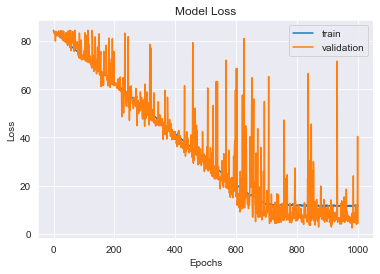

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

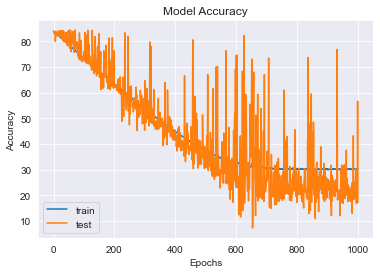

In [28]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
model.evaluate(dfX_test,y_test)

95/95 [==============================] - 0s 933us/step - loss: 4.3320 - mean_absolute_error: 4.3181 - root_mean_squared_error: 17.1136


[4.331970691680908, 4.3181257247924805, 17.11357879638672]

In [29]:
y_train[0]

array([25.359])

In [30]:
y_train.shape

(476358, 1)

In [31]:
model(np.expand_dims(X_train[25],0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[18.763073]], dtype=float32)>